EMOTION SPEECH RECOGNITION


IMPORTING MODULES

In [2]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings("ignore")

LOADING THE DATASET


In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk("C:/Users/pragy/OneDrive/Desktop/Speech Emotion Recognition/archive"): #recursively walk through the path
    for filename in filenames: 
        paths.append(os.path.join(dirname, filename)) #making a full path for all files
        label = filename.split("_")[-1] #split names and append it to the labels list
        label = label.split(".")[0]
        labels.append(label.lower())
print("Dataset Loaded")

Dataset Loaded


In [4]:
paths[:5]

['C:/Users/pragy/OneDrive/Desktop/Speech Emotion Recognition/archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/pragy/OneDrive/Desktop/Speech Emotion Recognition/archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/pragy/OneDrive/Desktop/Speech Emotion Recognition/archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/pragy/OneDrive/Desktop/Speech Emotion Recognition/archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/pragy/OneDrive/Desktop/Speech Emotion Recognition/archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
df = pd.DataFrame()
df["Speech"] = paths
df["Label"] = labels
df.head()

,Speech,Label
0,C:/Users/pragy/OneDrive/Desktop/Speech Emotion...,angry
1,C:/Users/pragy/OneDrive/Desktop/Speech Emotion...,angry
2,C:/Users/pragy/OneDrive/Desktop/Speech Emotion...,angry
3,C:/Users/pragy/OneDrive/Desktop/Speech Emotion...,angry
4,C:/Users/pragy/OneDrive/Desktop/Speech Emotion...,angry


In [7]:
df["Label"].value_counts()

Label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

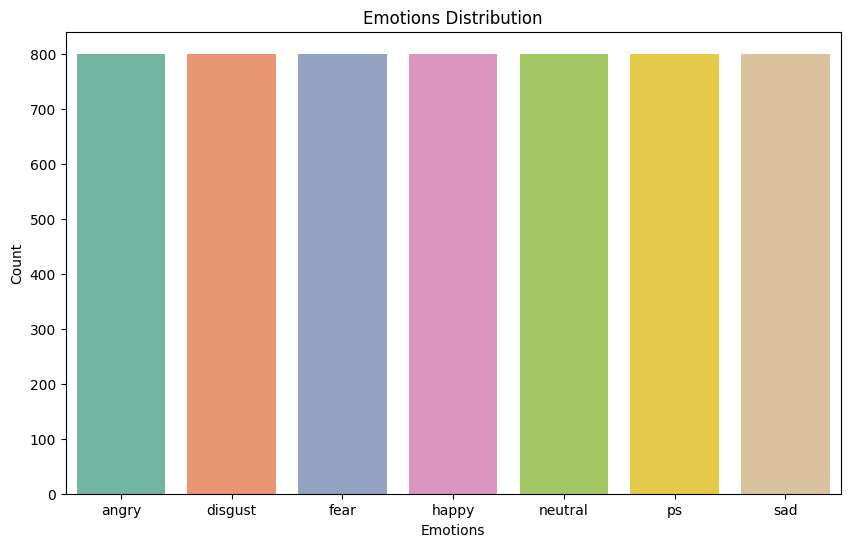

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', palette='Set2').set(title='Emotions Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()


FEATURE EXTRACTION


In [9]:
def waveformplot(data, sr, emotion): #sample rate = number of samples per second 
    plt.figure(figsize=(10,6))
    plt.title(emotion)
    librosa.display.waveshow(data, sr = sr)
    plt.show()

def spectogram (data, sr, emotion):
    x = librosa.stft(data)      #short term fourier series transformation to convert it into a frequency domain rep.
    xdb = librosa.amplitude_to_db (abs (x)) # convert into a decibel scale || using absolute value to convert ft complex number into real number
    plt.figure(figsize = (11,6)) 
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis="time", y_axis="hz") 
    plt.colorbar()

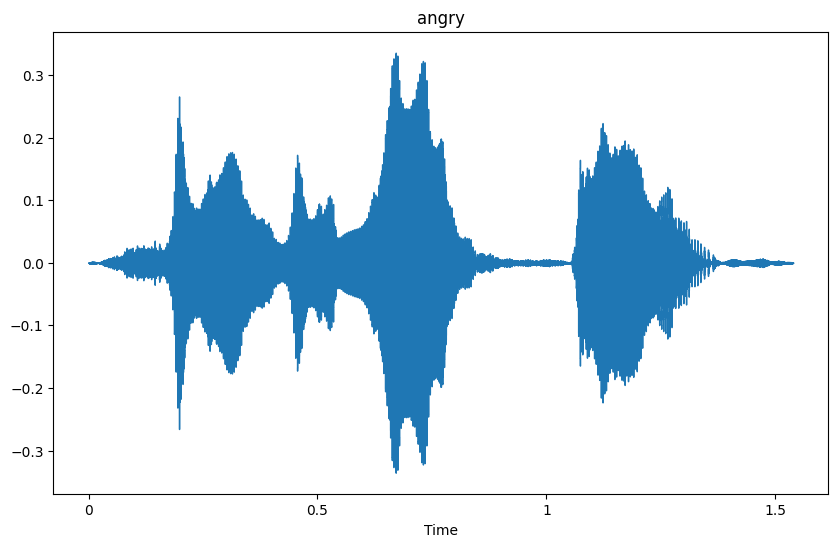

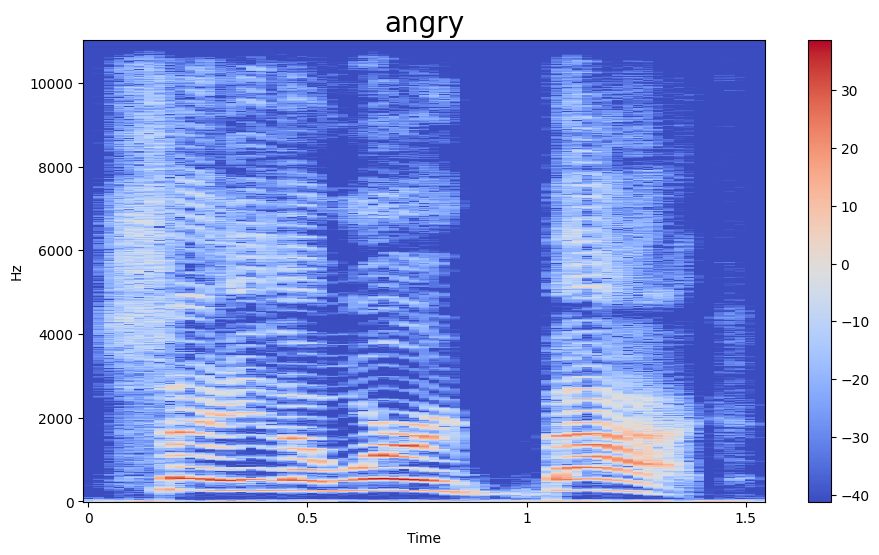

In [10]:
emotion = "angry"
path = df["Speech"][df['Label']==emotion][0] #path of the first data point with the given emotion
data, sampling_rate = librosa.load(path)    #loading the path of the audio into "data" and loading it's sampling rate
waveformplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


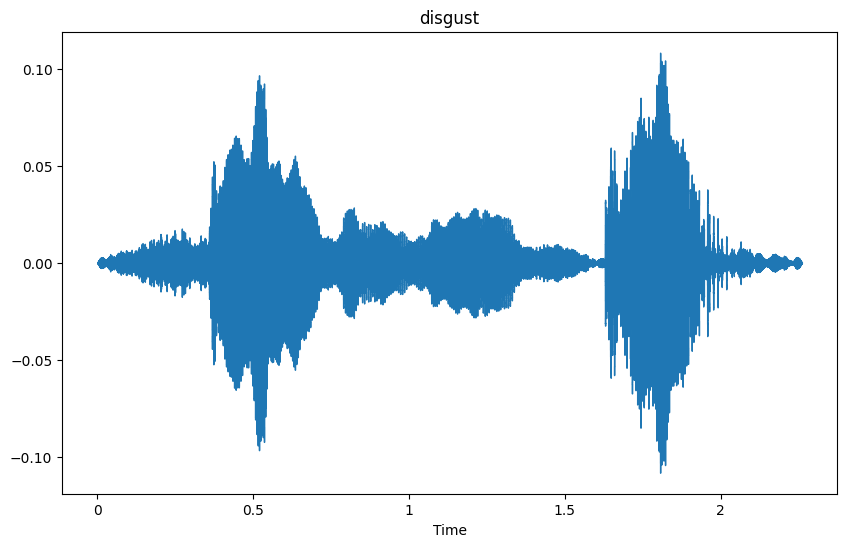

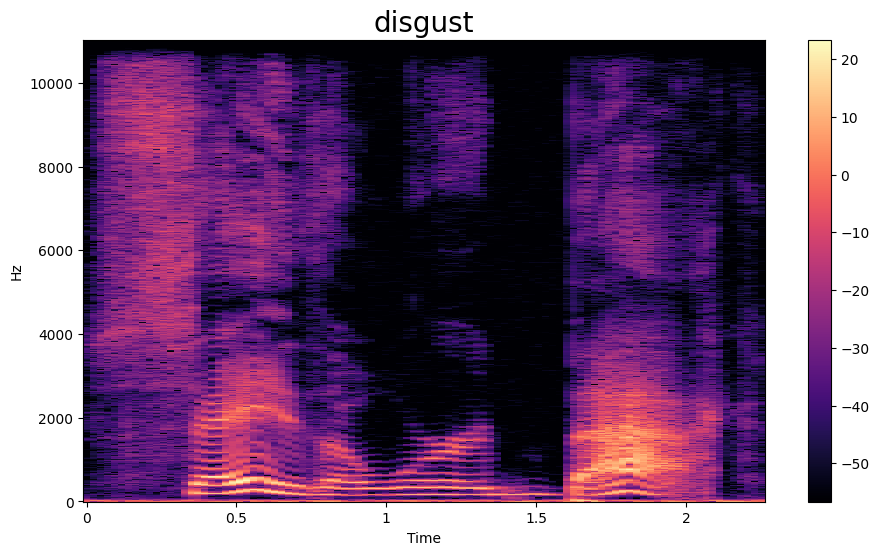

In [11]:
emotion = "disgust"

filtered_df = df[df['Label'] == emotion]
path = filtered_df["Speech"].iloc[0]  
data, sampling_rate = librosa.load(path)    
waveformplot(data, sampling_rate, emotion)  
spectogram(data, sampling_rate, emotion)    
Audio(path)  # Play the audio

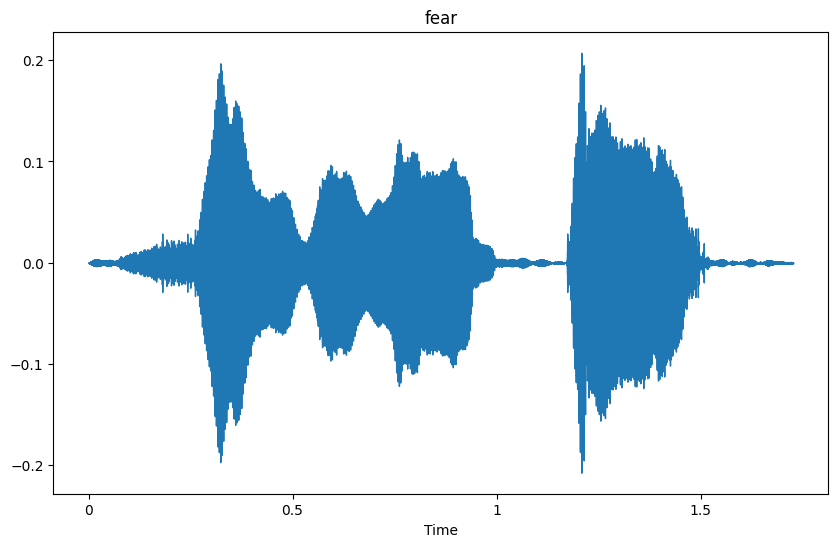

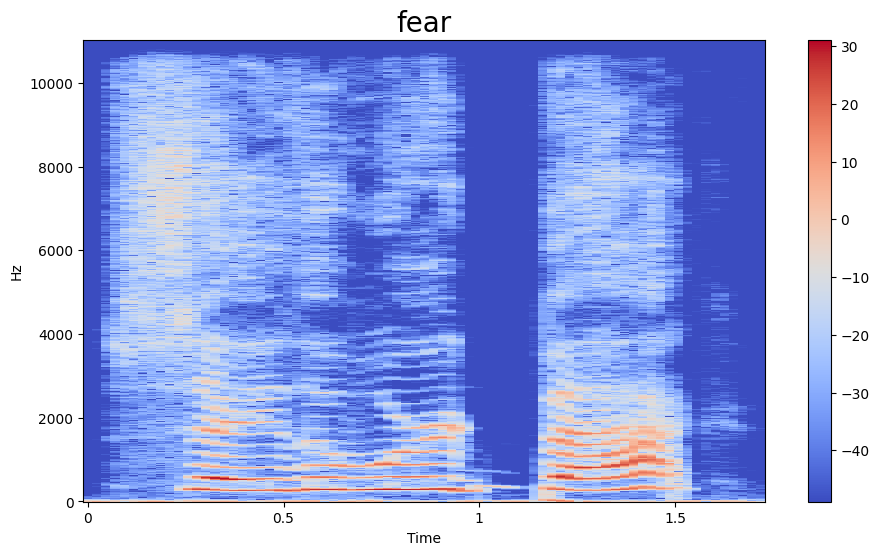

In [12]:
emotion = "fear"

filtered_df = df[df['Label'] == emotion]
path = filtered_df["Speech"].iloc[0]  
data, sampling_rate = librosa.load(path)    
waveformplot(data, sampling_rate, emotion)  
spectogram(data, sampling_rate, emotion)    
Audio(path)  # Play the audio


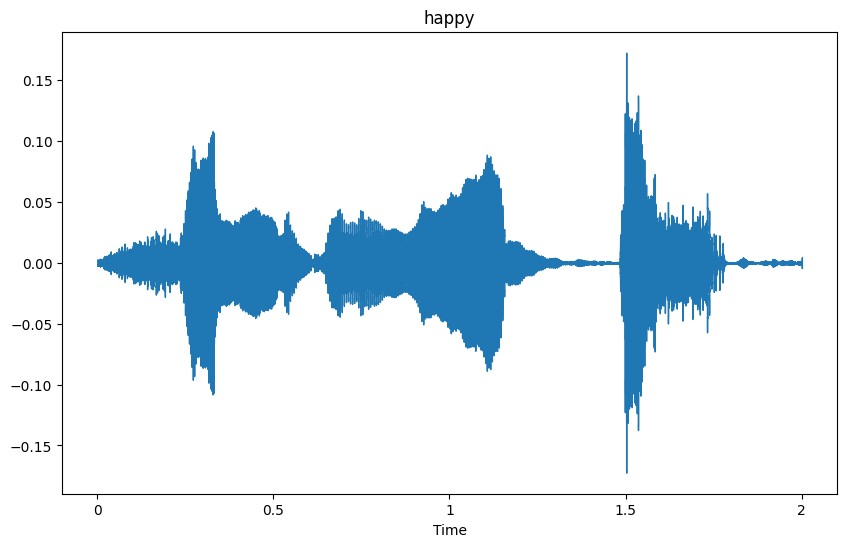

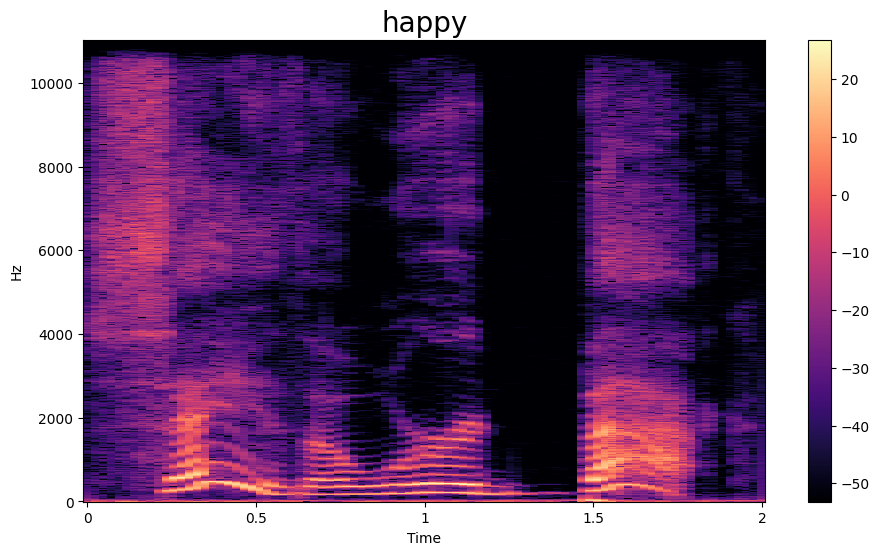

In [13]:
emotion = "happy"

filtered_df = df[df['Label'] == emotion]
path = filtered_df["Speech"].iloc[0]  
data, sampling_rate = librosa.load(path)    
waveformplot(data, sampling_rate, emotion)  
spectogram(data, sampling_rate, emotion)    
Audio(path)  # Play the audio


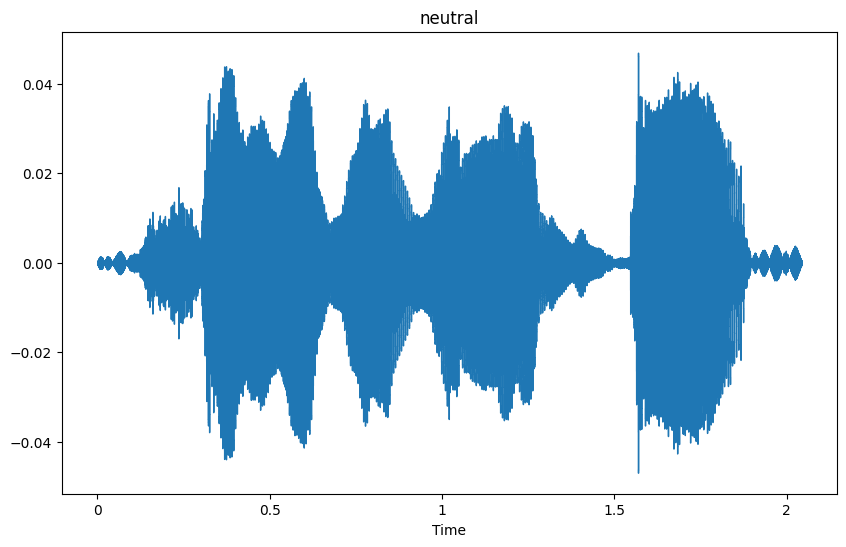

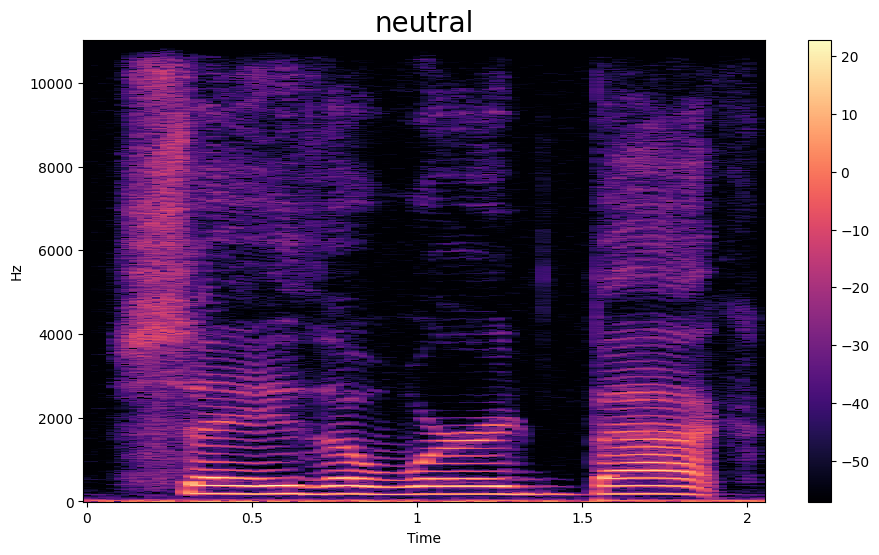

In [14]:
emotion = "neutral"

filtered_df = df[df['Label'] == emotion]
path = filtered_df["Speech"].iloc[0]  
data, sampling_rate = librosa.load(path)    
waveformplot(data, sampling_rate, emotion)  
spectogram(data, sampling_rate, emotion)    
Audio(path)  # Play the audio


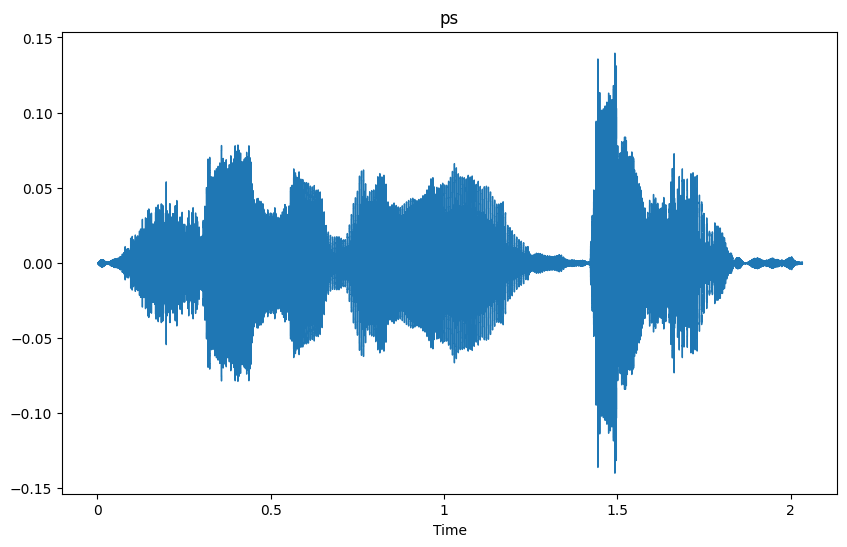

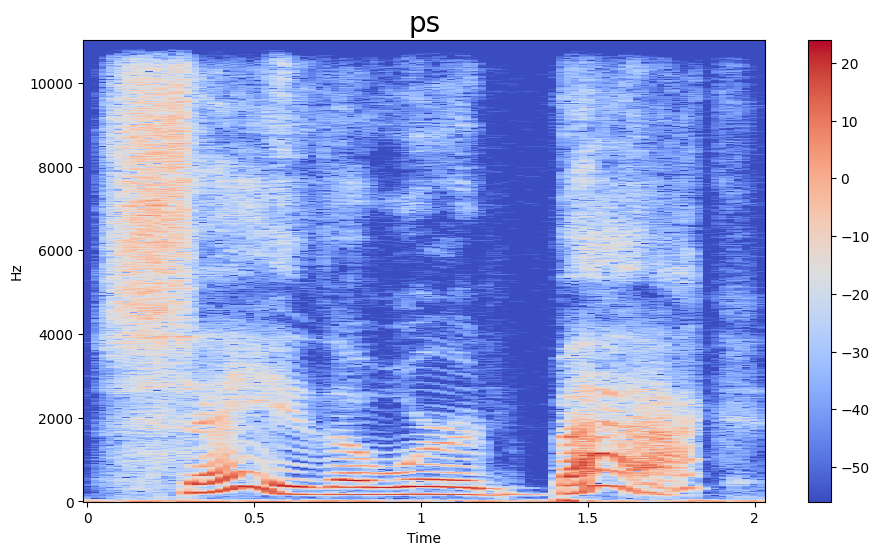

In [15]:
emotion = "ps"

filtered_df = df[df['Label'] == emotion]
path = filtered_df["Speech"].iloc[0]  
data, sampling_rate = librosa.load(path)    
waveformplot(data, sampling_rate, emotion)  
spectogram(data, sampling_rate, emotion)    
Audio(path)  # Play the audio


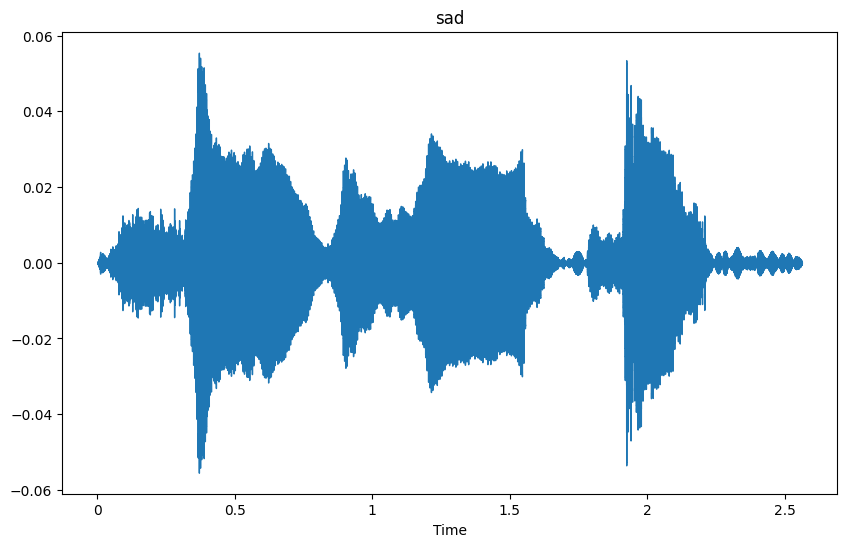

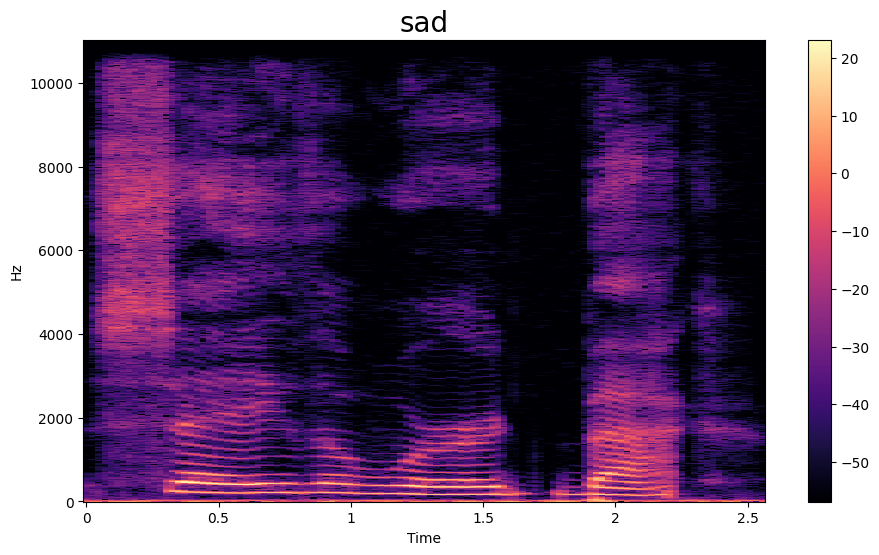

In [16]:
emotion = "sad"

filtered_df = df[df['Label'] == emotion]
path = filtered_df["Speech"].iloc[0]  
data, sampling_rate = librosa.load(path)    
waveformplot(data, sampling_rate, emotion)  
spectogram(data, sampling_rate, emotion)    
Audio(path)  # Play the audio


In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc 

extract_mfcc(df["Speech"][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255339e+00,  2.02101454e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115955e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585308e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917236e+00,  3.94722104e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996327e+00, -1.82390726e+00,
        4.86896229e+00,  9.31392384e+00,  2.08915043e+00, -1.90649140e+00],
      dtype=float32)

In [18]:
X_mfcc = df["Speech"].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550476, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.90637, 28.373262, 39.577065, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: Speech, Length: 5600, dtype: object

In [20]:
from sklearn.preprocessing import OneHotEncoder
#Preparing the labels by converting them into numerical data type
enc = OneHotEncoder()   #creating class instance
y = enc.fit_transform(df[['Label']])    #transforming the labels into numerical value by learning unique values.
y = y.toarray()
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
#preparing the features
X = [x for x in X_mfcc]
X = np.array(X)
X

array([[-396.9862   ,   77.44054  ,  -19.59279  , ...,    9.313924 ,
           2.0891504,   -1.9064914],
       [-465.73267  ,   98.77373  ,    0.6560089, ...,    8.680708 ,
           4.173659 ,    3.258969 ],
       [-429.79196  ,   46.12401  ,    1.5550476, ...,    8.633683 ,
          -2.422829 ,   -2.3461313],
       ...,
       [-378.50494  ,   80.91062  ,   35.300533 , ...,    6.4638786,
           4.545148 ,    7.043935 ],
       [-434.8618   ,   89.90637  ,   28.373262 , ...,   10.526768 ,
          11.808918 ,   10.119672 ],
       [-421.8341   ,   70.69788  ,   32.476387 , ...,    5.080212 ,
           5.1315765,    6.3598347]], dtype=float32)

TRAINING THE MODEL

In [22]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42) 
#MFCC were sent as features and labels were sent as target labels

In [23]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout 

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5), 
    Dense(128, activation='relu'), 
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['a']) #loss function, adam = optimizer, metrics is accuracy to track accuracy
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])#
model.summary()
Model:"sequential"


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,655 (1.17 MB)

 Trainable params: 307,655 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
X_train = np.array([arr.astype('float32') for arr in X_train.flatten()])
X_train = X_train.reshape(-1, 40,1)
y_train = y_train.astype('float32')

X_val = np.array([arr.astype('float32') for arr in X_val.flatten()])
X_val  = X_val.reshape(-1, 40, 1)
y_val = y_val.astype('float32')

In [25]:
from keras.callbacks import ModelCheckpoint

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 50, batch_size=64)
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.1853 - loss: 1.9372 - val_accuracy: 0.6661 - val_loss: 1.3775
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4084 - loss: 1.4424 - val_accuracy: 0.7411 - val_loss: 0.7191
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5834 - loss: 0.9933 - val_accuracy: 0.8098 - val_loss: 0.4669
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.7057 - loss: 0.7598 - val_accuracy: 0.8402 - val_loss: 0.4591
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.7464 - loss: 0.6434 - val_accuracy: 0.9580 - val_loss: 0.2066
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.8282 - loss: 0.4756 - val_accuracy: 0.9670 - val_loss: 0.1340
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.8754 - loss: 0.4060 - val_accuracy: 0.9688 - val_loss: 0.1130
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9068 - loss: 0.3007 - val_accuracy: 0.9759 - v

RESULT PLOTTING

In [26]:
from sklearn import metrics
y_true = ['acc']
y_pred = ['val_acc']
metrics.confusion_matrix(y_true, y_pred)

array([[0, 1],
       [0, 0]], dtype=int64)

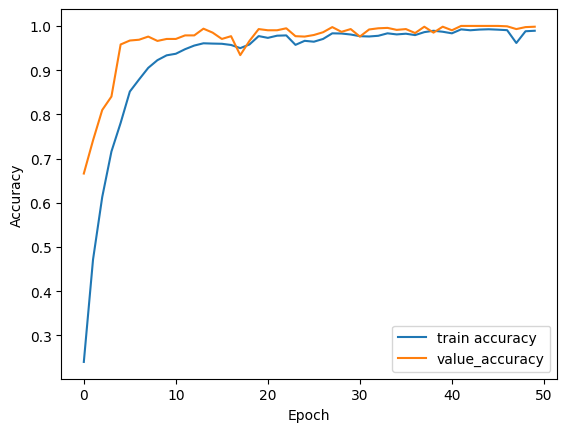

In [32]:
#epoch accuracy plotting
epochs = list(range(50))
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label = "train accuracy")
plt.plot(epochs, val_acc, label = "value_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()  


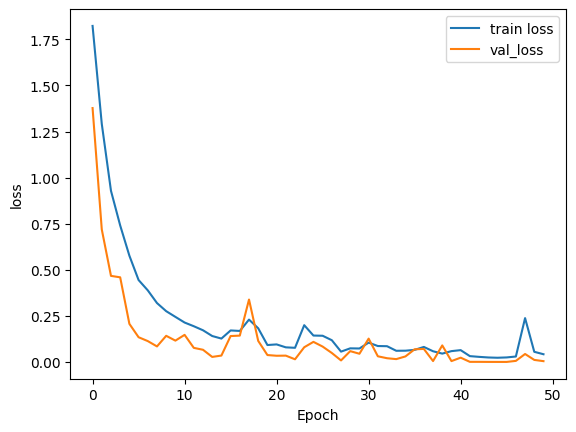

In [34]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "train loss")
plt.plot(epochs, val_loss, label = "val_loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
# Access the training accuracy
train_acc = history.history["accuracy"]

# Calculate the average training accuracy
average_train_accuracy = sum(train_acc) / len(train_acc)

# Access the validation accuracy
val_acc = history.history['val_accuracy']

# Calculate the average validation accuracy
average_val_accuracy = sum(val_acc) / len(val_acc)

# Print the results
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {average_val_accuracy:.4f}")


Average Training Accuracy: 0.9259
Average Validation Accuracy: 0.9673
